In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"]) 

In [5]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.head(20)

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,29.699118,8.4583
6,0,54.000000,51.8625
7,0,2.000000,21.0750
8,1,27.000000,11.1333
9,1,14.000000,30.0708


In [12]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [15]:
X_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [16]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [17]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

/home/revolution/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_8610/2478052444.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


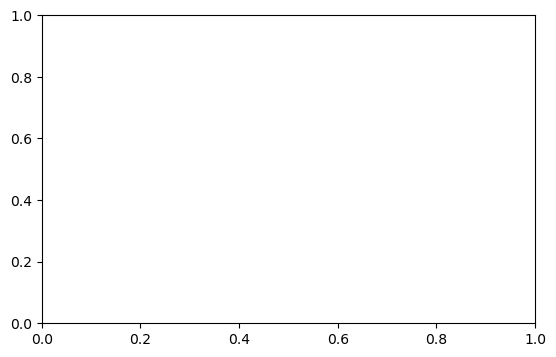

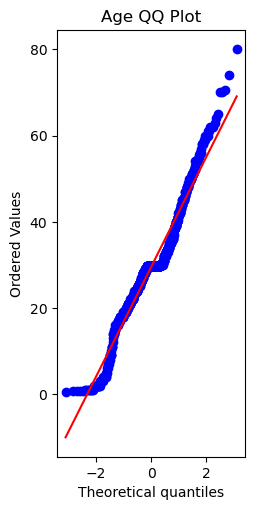

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age QQ Plot")
plt.show()

/tmp/ipykernel_8610/2877889712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


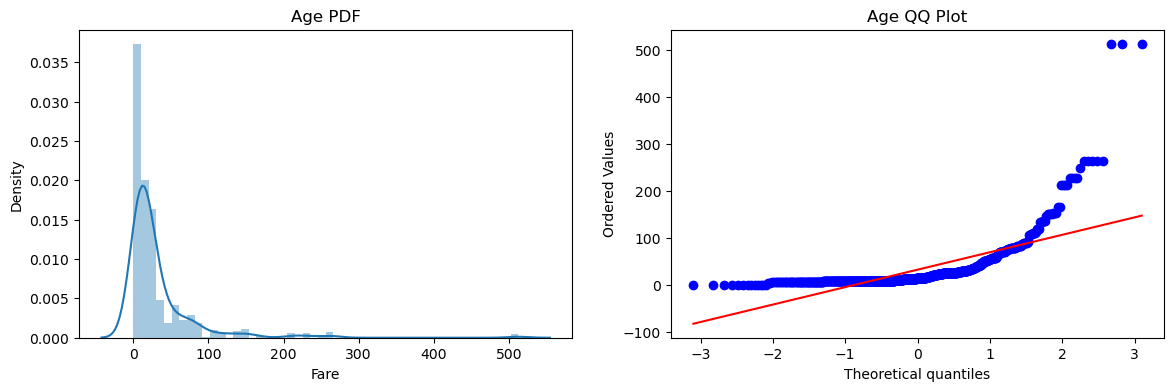

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


In [20]:
trf = FunctionTransformer(func=np.log1p)

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [24]:
clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [26]:
y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [27]:
print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [28]:
X_transformed = trf.fit_transform(X)
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6633458177278402
